In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display
import seaborn  as sns

Text(0,0.5,'Second Feature')

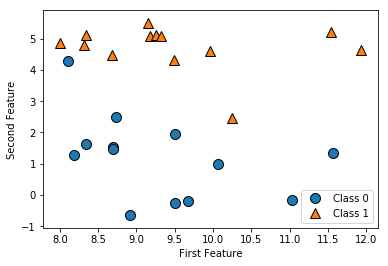

In [85]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc =4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")

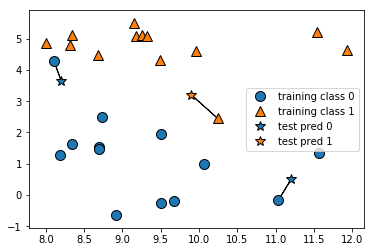

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

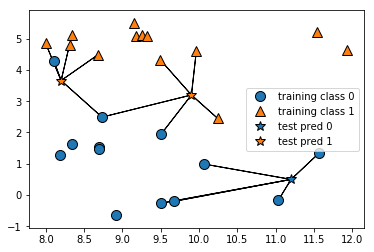

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors = 5)

## KNN

In [11]:
X.shape

(26, 2)

In [57]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y,stratify = y, random_state = 0)

In [58]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 1)

In [59]:
knn.fit(X_tr, y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [60]:
knn.score(X_te, y_te)

1.0

### analyzation of KNeighborsClassifier
#### diffs of classification area between 1,3,9 n_neighbors

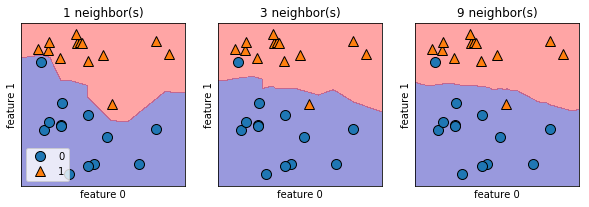

In [61]:
fig, axes = plt.subplots(1,3,figsize = (10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax = ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc = 3)
#w/ small num of neighbors, the border line will be complex (over fitting)
#w/ mid ~ large num of neighbors, simple

#### diffs of accuracy between n_neighbors w/ cancer dataset

In [48]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [52]:
np.shape(cancer.data)

(569, 30)

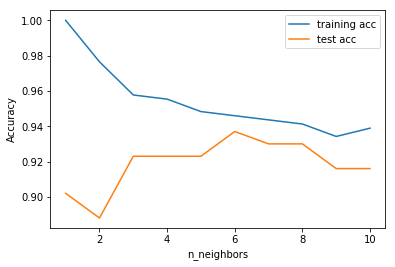

In [86]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)
from sklearn.neighbors import KNeighborsClassifier 

n_neighbors_settings = range(1,11)
tr_score = []
te_score = []

for n_neighbors in n_neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_tr, y_tr)
    tr_score.append(knn.score(X_tr, y_tr)) #"append": to add num continously  while in for section
    te_score.append(knn.score(X_te, y_te))
    
plt.plot(n_neighbors_settings, tr_score, label = "training acc")
plt.plot(n_neighbors_settings, te_score, label = "test acc")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

